The screenshots in this notebook are taken from *An Introduction to Statistical Learning*, which is available [here](https://www.statlearning.com/).

### Logistic Regression Theory

Logistic regression is a statistical method used to analyze the relationship between a binary dependent variable and one or more independent variables. It is commonly used in machine learning for classification problems, where the goal is to predict the class of a new observation based on its features.

**The Logistic Formula**

The logistic formula is used to model the probability of the dependent variable taking on a certain value (usually 1) given the values of the independent variables. The formula is:

$$ P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p)}} $$

where:
- $P(y=1|x)$ is the probability of the dependent variable (y) taking on the value 1 given the values of the independent variables (x).
- $\beta_0, \beta_1, \beta_2, ..., \beta_p$ are the regression coefficients that determine the effect of each independent variable on the dependent variable.
- $x_1, x_2, ..., x_p$ are the values of the independent variables.

**Estimating the Regression Coefficients**

The regression coefficients in the logistic formula can be estimated using maximum likelihood estimation (MLE). The goal of MLE is to find the values of the regression coefficients that maximize the likelihood of observing the data given the model. This involves finding the values of the regression coefficients that make the predicted probabilities as close as possible to the observed probabilities.

c:\Users\LuukvanRoessel\Anaconda3\envs\ml-luuk\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


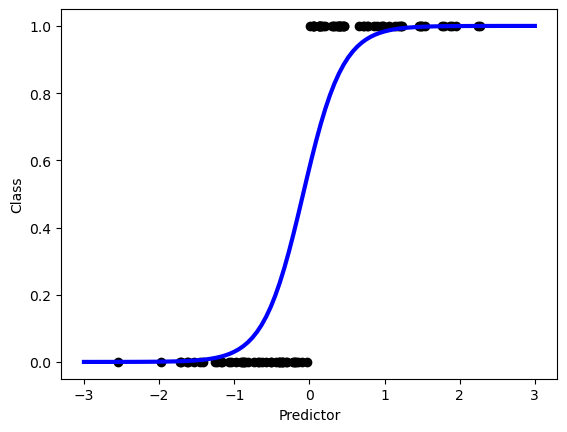

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# create a simple dataset with one predictor and a binary categorical class
np.random.seed(0)
X = np.random.randn(100, 1)
y = (X > 0).astype(int)

# fit a logistic regression model to the data
model = LogisticRegression()
model.fit(X, y)

# plot the data and the logistic regression curve
plt.scatter(X, y, color='black')
x_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
y_plot = model.predict_proba(x_plot)[:, 1]
plt.plot(x_plot, y_plot, color='blue', linewidth=3)
plt.xlabel('Predictor')
plt.ylabel('Class')
plt.show()

## Generative models for classification

$$ Pr(Y = k|X = x) = \frac{Pr(Y)Pr(X|Y)}{Pr(X)}= \frac{\pi_kf_k(x)}{\sum^{K}_{l=1}\pi_lf_l(x)}$$
- $\pi_k$ is the *prior probability* that a random chosen observation comes from the *k*th class. Often computed by taking the fraction of the training data that relates to a specific observation.
- $f_k(X) = PR(X|Y = k)$ is the density function of X for an observation that comes from the *k*th class. If this component is large, there is a high probability that an observation in the *k*th class has X = x. By setting assumptions, we can estimate density function, i.e. applying LDA, QDA, and Naive Bayes.
- $Pr(Y=k|X=x) = p_k(x)$ is the posterior probability that an observation X=x belongs to the *k*th class, i.e. the probability that the observation belongs to the *k*th class, given the predictor value for that observation

Why do we need other methods when we have logistic regression?
- In case of substancially different classes, the parameter estimates of logistic regression [are surprisingly unstable](https://stats.stackexchange.com/questions/254124/why-does-logistic-regression-become-unstable-when-classes-are-well-separated), which is not the case for generative models
- If the distribution of the predictors is approximately normal in each class and the sample size is small, the generative models might be more accurate
- It is easier to expand to more response classes with generative models

## Linear Discriminant Analysis 
- We assume $f_k(x)$ is normal or gaussian, equation (4.16) in ISLP, with mean $\mu_k$ and variance $\sigma_k^2$
- In LDA specifically, we assume that variance matrix is identical for all different classes, $\sigma_1^2 = \sigma_2^2 = ... = \sigma_K^2 $ which gives equation (4.17)
- Taking the log of Equation 4.17 gives us
$$ \sigma_k(x) = x * \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log(\pi_k)$$
- The observation will be assigned to the class that gives the highest result of the equation above. The elements are:
    - *x* = the value of the observation
    - $\pi_k$, the probability of an observation coming from a class, taken from the training set, $\hat{\pi_k} = n_k/n$
    - $\mu_k$ The average observation value per class (4.20)
    - $\sigma^2$ the uniform variance, or the weighted average of the sample variances for each of the K classes -> common covariance matrix in case p>1
- The 'linear' in LDA comes from the fact that the discriminant functions $\sigma_k(x)$ are linear functions of x
- All observations on the LHS from the dashed lines will be assigned to class green, the ones on the RHS will be assigned to class purple

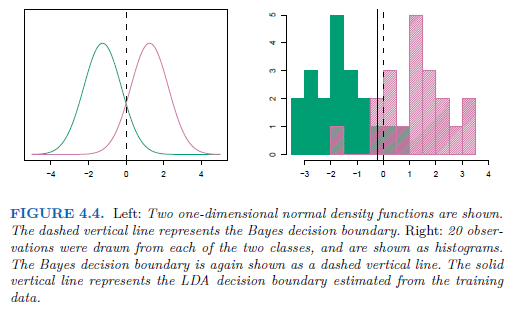
- In case of p>1, LDA assumes that the observations in the *k*th class are drawn from a multivariate Gaussian distribution $N(\mu_k, \sum)$, where $\mu_k$ is the class specific mean vector, and $\sum$ is the covariance matrix that is common to ak *K* classes. There might be correlation between the predictors, which is captured in $\sum$.

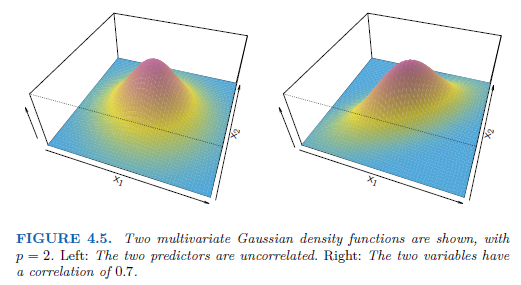

## Quadratic Discriminant Analysis
- QDA also assumes that the observations from each class are drawn from a Gaussian distribution. Unlike LDA, QDA assumes that each class has its own covariance matrix
- An observation is assigned to the class where $\sigma_k(x)$ in 4.28 is largest

When LDA and when QDA? The answer is in the bias variance trade-off. 
- Model complexity LDA: $p(p+1)/2$ -> preferred in case of low number of observations
- Model complexity QDA: $Kp(p+1)/2$ -> preferred in case of low number of observations

## Naive Bayes
Instead of assuming that $f_k(x)$ belong to a family of distributions (e.g. a Gaussian distribution), we make the assumption that: *"Within the kth class, the p predictors are independent"*, i.e.,
$$f_k(x) = f_{k1}(x_{1})*f_{k2}(x_2)*...*f_{kp}(x_{p})$$
Where $f_{kj}$ is the density function of the $j$th predictor among observations in the *k*th class.
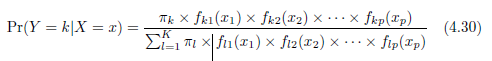


### Differences in model complexity
https://towardsdatascience.com/differences-of-lda-qda-and-gaussian-naive-bayes-classifiers-eaa4d1e999f6

## ROC and AUC
[Explanation](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) on ROC and AUC
$$\textrm{True positive rate(TPR)}= \frac{TP}{TP + FN}$$
$$\textrm{False positive rate(FPR)}= \frac{FP}{FP + TN}$$
AUC is area under the curve, which can be used to benchmark different models, AUC of 1 is the max score
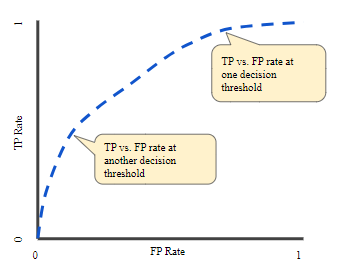


### Conclusion on the confusion matrices
I have two thoughts on the LDA and QDA methods:
- From the pair plot, I can see that different classes have different variances, which makes me believe QDA would be a better method to use. The confusion matrix underlines this thought. 
- In terms of model complexity, for QDA I am predicting $K*p*(p+1)/2 = 110$ parameters, which is super high given the number of observations
- Therefore it sounds like a trade-off between the effect of assuming similar variance vs. a lack of observations to get an accurate model

I don't think Gaussian Naive Bayes is a suitable method as it assumes *"Within the kth class, the p predictors are independent"*. Mechanically seen, the flow and EI are dependent, a lower flow will result in a higher probability of seeing a lower EI.

Based on [this](https://www.scirp.org/pdf/oalibj_2022021716322673.pdf) paper, I would choose Linear regression over LDA, because:
- LDA requires multivariate normality while LR is robust against deviations
- *"If sample size `n` is small and distribution of X is approximately normal in each of the classes, LDA is more stable than logistic regression"* -> The normal shape assumption is not valid in this case

In [2]:
import pandas as pd

temp = pd.read_pickle('temp.pkl')

In [7]:
from ISLP.models import (ModelSpec as MS,
summarize)
import statsmodels.api as sm

In [19]:
temp = pd.read_pickle('temp.pkl')
temp.drop(columns=['ei_dist_multigroup', 'max_ei_ratio', 'flow_dist_multigroup', 'flow_average', 'flow_dist', 'ei_dist', 'ei_weighted_std', 'flow_weighted_std'], inplace=True)

allvars = temp.columns.drop(['interesting'])
design = MS(allvars)
X = design.fit_transform(temp)
y = temp.interesting == 1
glm = sm.GLM(y,
X,
family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-0.6076,0.578,-1.052,0.293
ei_average,0.0063,0.002,3.157,0.002
pct_outliers,-15.0570,6.658,-2.261,0.024


In [7]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
import pandas as pd

df_no_nan = pd.read_pickle('temp.pkl')

X_temp = df_no_nan[['flow_average', 'ei_average']]
y_temp = df_no_nan['interesting']

X_ttrain, X_ttest, y_ttrain, y_ttest = train_test_split(X_temp, y_temp, test_size=0.25, random_state=0)

LogisticRegression score: 0.5
[[3 6]
 [0 3]]
LinearDiscriminantAnalysis score: 0.4166666666666667
[[2 7]
 [0 3]]
QuadraticDiscriminantAnalysis score: 0.8333333333333334
[[8 1]
 [1 2]]
GaussianNB score: 0.4166666666666667
[[2 7]
 [0 3]]


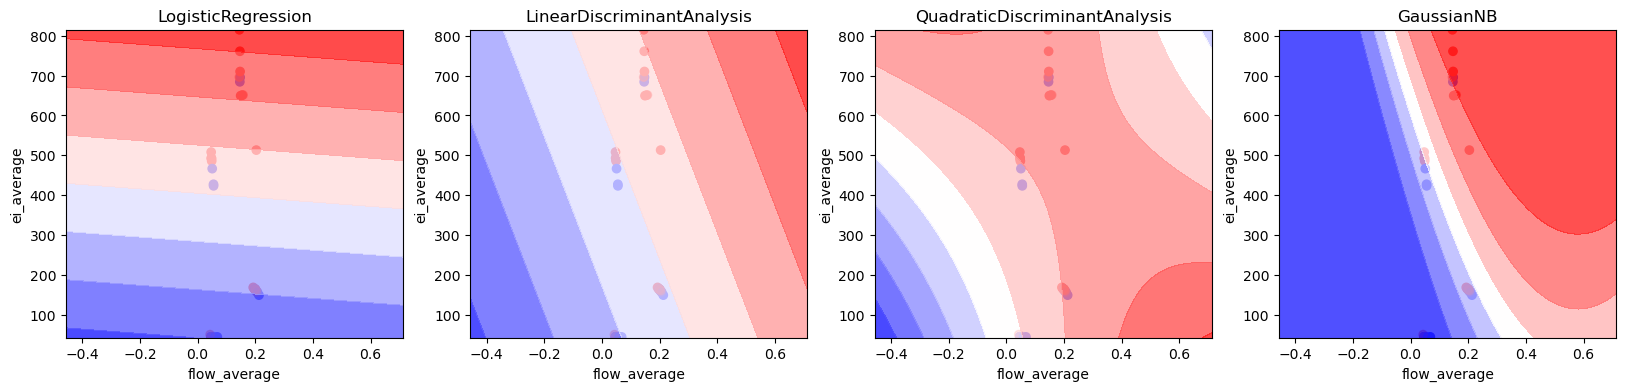

In [18]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression as LR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn import metrics


fig, ax = plt.subplots(1, 4, figsize=(20, 4))

classifiers = [LR(), LDA(), QDA(), GNB()]

for i in range(4):
    ax[i].scatter(X_ttrain['flow_average'], X_ttrain['ei_average'], c=y_ttrain, cmap = 'bwr')
    ax[i].scatter(X_ttest['flow_average'], X_ttest['ei_average'], c=y_ttest, cmap = 'bwr', alpha=0.5)
    classifier = classifiers[i].fit(X_ttrain, y_ttrain)
    DecisionBoundaryDisplay.from_estimator(classifier, X_temp, cmap='bwr', alpha=0.8, ax=ax[i], eps=0.5)
    ax[i].set_title(classifier.__class__.__name__)
    print(f"{classifier.__class__.__name__} score: {classifier.score(X_ttest, y_ttest)}")
    y_pred = classifier.predict(X_ttest)
    conf_mat = metrics.confusion_matrix(y_ttest, y_pred, labels=[True, False])
    print(conf_mat)


